In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
import os
import warnings

warnings.filterwarnings('ignore')
os.environ["NUMBA_NUM_THREADS"] = "1"
os.environ["JOBLIB_START_METHOD"] = "spawn"
%matplotlib inline



In [2]:
# Load the dataset (CPTEVENTS more information)
d_cpt = pd.read_csv('D_CPT.csv.gz')

# Preview the dataset
d_cpt.head()

,ROW_ID,CATEGORY,SECTIONRANGE,SECTIONHEADER,SUBSECTIONRANGE,SUBSECTIONHEADER,CODESUFFIX,MINCODEINSUBSECTION,MAXCODEINSUBSECTION
0,1,1,99201-99499,Evaluation and management,99201-99216,Office/other outpatient services,NaN,99201,99216
1,2,1,99201-99499,Evaluation and management,99217-99220,Hospital observation services,NaN,99217,99220
2,3,1,99201-99499,Evaluation and management,99221-99239,Hospital inpatient services,NaN,99221,99239
3,4,1,99201-99499,Evaluation and management,99241-99255,Consultations,NaN,99241,99255
4,5,1,99201-99499,Evaluation and management,99261-99263,Follow-up inpatient consultations (deleted codes),NaN,99261,99263


In [3]:
# Step 3: Info and missing values
d_cpt.info()
print(d_cpt.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ROW_ID               134 non-null    int64 
 1   CATEGORY             134 non-null    int64 
 2   SECTIONRANGE         134 non-null    object
 3   SECTIONHEADER        134 non-null    object
 4   SUBSECTIONRANGE      134 non-null    object
 5   SUBSECTIONHEADER     134 non-null    object
 6   CODESUFFIX           11 non-null     object
 7   MINCODEINSUBSECTION  134 non-null    int64 
 8   MAXCODEINSUBSECTION  134 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 9.5+ KB
ROW_ID                   0
CATEGORY                 0
SECTIONRANGE             0
SECTIONHEADER            0
SUBSECTIONRANGE          0
SUBSECTIONHEADER         0
CODESUFFIX             123
MINCODEINSUBSECTION      0
MAXCODEINSUBSECTION      0
dtype: int64


In [4]:
# Step 4: Drop duplicates
d_cpt.drop_duplicates(inplace=True)



In [5]:
# You can choose relevant categorical columns from this dataset
categorical_cols = ['SECTIONHEADER', 'SUBSECTIONHEADER']
for col in categorical_cols:
    d_cpt[col] = d_cpt[col].fillna('missing')  # handle NaNs
    d_cpt[col + '_CAT'] = d_cpt[col].astype('category').cat.codes


In [6]:
# Save cleaned version
d_cpt_cleaned = d_cpt.copy()
d_cpt_cleaned.to_csv('d_cpt_cleaned.csv', index=False)

# Load again if needed
d_cpt_cleaned = pd.read_csv('d_cpt_cleaned.csv')

In [7]:
# Verify first
print(d_cpt_cleaned.head())

# Then clearly save it
d_cpt_cleaned.to_csv('d_cpt_cleaned.csv', index=False)


   ROW_ID  CATEGORY SECTIONRANGE              SECTIONHEADER SUBSECTIONRANGE  \
0       1         1  99201-99499  Evaluation and management     99201-99216   
1       2         1  99201-99499  Evaluation and management     99217-99220   
2       3         1  99201-99499  Evaluation and management     99221-99239   
3       4         1  99201-99499  Evaluation and management     99241-99255   
4       5         1  99201-99499  Evaluation and management     99261-99263   

                                    SUBSECTIONHEADER CODESUFFIX  \
0                   Office/other outpatient services        NaN   
1                      Hospital observation services        NaN   
2                        Hospital inpatient services        NaN   
3                                      Consultations        NaN   
4  Follow-up inpatient consultations (deleted codes)        NaN   

   MINCODEINSUBSECTION  MAXCODEINSUBSECTION  SECTIONHEADER_CAT  \
0                99201                99216             

In [8]:
# Install and check SDV
!pip install sdv


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [9]:
import sdv
print(sdv.__version__)


1.23.0


In [10]:
# Imports
import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

#  Imports
import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
import os

In [11]:
#  Fix multiprocessing on Windows
os.environ["NUMBA_NUM_THREADS"] = "1"
os.environ["JOBLIB_START_METHOD"] = "spawn"
# cleaning step 
d_cpt_cleaned = d_cpt.dropna()  # drop NaNs just like in the ADMISSIONS workflow
print(d_cpt_cleaned.head())
d_cpt_cleaned.to_csv('d_cpt_cleaned.csv', index=False)

     ROW_ID  CATEGORY SECTIONRANGE            SECTIONHEADER SUBSECTIONRANGE  \
123     124         2  0001F-7025F  Performance measurement     0001F-0015F   
124     125         2  0001F-7025F  Performance measurement     0500F-0575F   
125     126         2  0001F-7025F  Performance measurement     1000F-1220F   
126     127         2  0001F-7025F  Performance measurement     2000F-2050F   
127     128         2  0001F-7025F  Performance measurement     3006F-3573F   

                              SUBSECTIONHEADER CODESUFFIX  \
123                         Composite measures          F   
124                         Patient management          F   
125                            Patient history          F   
126                       Physical examination          F   
127  Diagnostic/screening processes or results          F   

     MINCODEINSUBSECTION  MAXCODEINSUBSECTION  SECTIONHEADER_CAT  \
123                    1                   15                  5   
124                  5

In [12]:
d_cpt_cleaned = pd.read_csv("d_cpt_cleaned.csv")
d_cpt_cleaned.head()

,ROW_ID,CATEGORY,SECTIONRANGE,SECTIONHEADER,SUBSECTIONRANGE,SUBSECTIONHEADER,CODESUFFIX,MINCODEINSUBSECTION,MAXCODEINSUBSECTION,SECTIONHEADER_CAT,SUBSECTIONHEADER_CAT
0,124,2,0001F-7025F,Performance measurement,0001F-0015F,Composite measures,F,1,15,5,16
1,125,2,0001F-7025F,Performance measurement,0500F-0575F,Patient management,F,500,575,5,92
2,126,2,0001F-7025F,Performance measurement,1000F-1220F,Patient history,F,1000,1220,5,91
3,127,2,0001F-7025F,Performance measurement,2000F-2050F,Physical examination,F,2000,2050,5,97
4,128,2,0001F-7025F,Performance measurement,3006F-3573F,Diagnostic/screening processes or results,F,3006,3573,5,26


In [13]:
#  Generate metadata for SINGLE TABLE
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(d_cpt_cleaned)

#  Initialize synthesizer (no enforce_minimal in this version)
synthesizer = CTGANSynthesizer(
    metadata=metadata,
    epochs=30
)

In [14]:
#  Fit the synthesizer to the data
synthesizer.fit(d_cpt_cleaned)


In [15]:
#  Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=len(d_cpt_cleaned))
synthetic_data = synthesizer.sample(num_rows=1000)


In [16]:
#  Save synthetic data
synthetic_data.to_csv("synthetic_d_cpt.csv", index=False)

#  Preview
synthetic_data.head()

,ROW_ID,CATEGORY,SECTIONRANGE,SECTIONHEADER,SUBSECTIONRANGE,SUBSECTIONHEADER,CODESUFFIX,MINCODEINSUBSECTION,MAXCODEINSUBSECTION,SECTIONHEADER_CAT,SUBSECTIONHEADER_CAT
0,7552692,2,0001F-7025F,Performance measurement,7010F-7025F,Temporary codes,F,7010,300,4,74
1,10923999,2,0001F-7025F,Emerging technology,1000F-1220F,Structural Measures,F,7010,15,3,16
2,14249885,2,0001F-7025F,Performance measurement,0256T-0259T,Temporary codes,F,7010,15,4,16
3,1057122,2,0001F-7025F,Performance measurement,7010F-7025F,Physical examination,F,7010,15,5,58
4,13394955,2,0001F-7025F,Performance measurement,0016T-0207T,Diagnostic/screening processes or results,F,7010,15,4,60


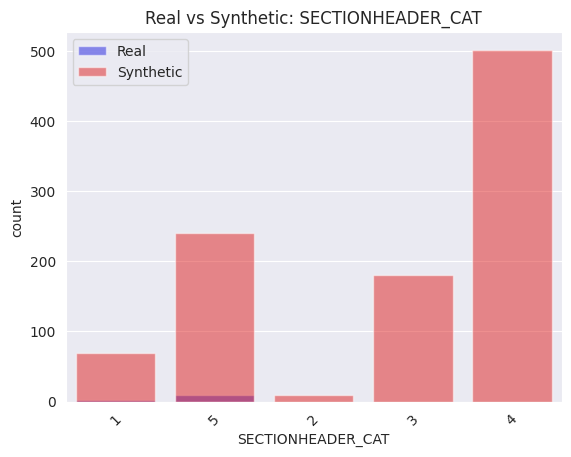

In [17]:
# Real data

column='SECTIONHEADER_CAT'
sns.countplot(x=column, data=d_cpt_cleaned, color='blue', label='Real', alpha=0.5)

# Synthetic data
sns.countplot(x=column, data=synthetic_data, color='red', label='Synthetic', alpha=0.5)

plt.legend()
plt.title(f"Real vs Synthetic: {column}")
plt.xticks(rotation=45)
plt.show()


In [18]:
# Load synthetic dataset if not already in memory
synthetic = pd.read_csv("synthetic_d_cpt.csv")

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [19]:
# Example: Predict MINCODEINSUBSECTION using synthetic vs real
features = ['CATEGORY', 'SECTIONHEADER_CAT', 'SUBSECTIONHEADER_CAT']
target = 'MINCODEINSUBSECTION'

# Preprocessing (convert target to binary classification)
d_cpt_cleaned['target'] = (d_cpt_cleaned[target] > d_cpt_cleaned[target].median()).astype(int)
synthetic['target'] = (synthetic[target] > d_cpt_cleaned[target].median()).astype(int)

In [20]:
# Preprocessing features
for col in features:
    d_cpt_cleaned[col] = d_cpt_cleaned[col].astype('category').cat.codes
    synthetic[col] = synthetic[col].astype('category').cat.codes

In [21]:
# Real data model
X_real = d_cpt_cleaned[features]
y_real = d_cpt_cleaned['target']
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_real, y_real, test_size=0.3)

model_real = RandomForestClassifier()
model_real.fit(Xr_train, yr_train)
real_acc = accuracy_score(yr_test, model_real.predict(Xr_test))


In [22]:
# Synthetic data model
X_syn = synthetic[features]
y_syn = synthetic['target']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_syn, y_syn, test_size=0.3)

model_syn = RandomForestClassifier()
model_syn.fit(Xs_train, ys_train)
syn_acc = accuracy_score(ys_test, model_syn.predict(Xs_test))

print(f" Model accuracy on real data: {real_acc:.2f}")
print(f" Model accuracy on synthetic data:{syn_acc:.2f}")

 Model accuracy on real data: 0.25
 Model accuracy on synthetic data:0.87


In [23]:
from sdv.single_table import TVAESynthesizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target (from D_CPT structure)
features = ['CATEGORY', 'SECTIONHEADER_CAT', 'SUBSECTIONHEADER_CAT']
target_col = 'MINCODEINSUBSECTION'

# Create binary classification target
d_cpt_cleaned['target'] = (d_cpt_cleaned[target_col] > d_cpt_cleaned[target_col].median()).astype(int)

# Regenerate metadata (if needed)
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(d_cpt_cleaned.drop(columns=['target']))

# Fit TVAE (drop target column before fitting)
vae_synthesizer = TVAESynthesizer(metadata=metadata, epochs=300)
vae_synthesizer.fit(d_cpt_cleaned.drop(columns=['target']))

# Sample synthetic data
synthetic_data_vae = vae_synthesizer.sample(num_rows=1000)

# Add target to synthetic data
synthetic_data_vae['target'] = (synthetic_data_vae[target_col] > d_cpt_cleaned[target_col].median()).astype(int)

# Encode categorical features
for col in features:
    d_cpt_cleaned[col] = d_cpt_cleaned[col].astype('category').cat.codes
    synthetic_data_vae[col] = synthetic_data_vae[col].astype('category').cat.codes

# Train/test split
X_real = d_cpt_cleaned[features]
y_real = d_cpt_cleaned['target']
X_vae = synthetic_data_vae[features]
y_vae = synthetic_data_vae['target']

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_real, y_real, test_size=0.3, random_state=42)
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X_vae, y_vae, test_size=0.3, random_state=42)

# Train models
model_real = RandomForestClassifier(random_state=42)
model_real.fit(Xr_train, yr_train)
real_acc = accuracy_score(yr_test, model_real.predict(Xr_test))

model_vae = RandomForestClassifier(random_state=42)
model_vae.fit(Xv_train, yv_train)
vae_acc = accuracy_score(yv_test, model_vae.predict(Xv_test))

# Results
print(f"Model accuracy on REAL D_CPT data: {real_acc:.2f}")
print(f"Model accuracy on VAE SYNTHETIC D_CPT: {vae_acc:.2f}")


Model accuracy on REAL D_CPT data: 0.25
Model accuracy on VAE SYNTHETIC D_CPT: 0.67


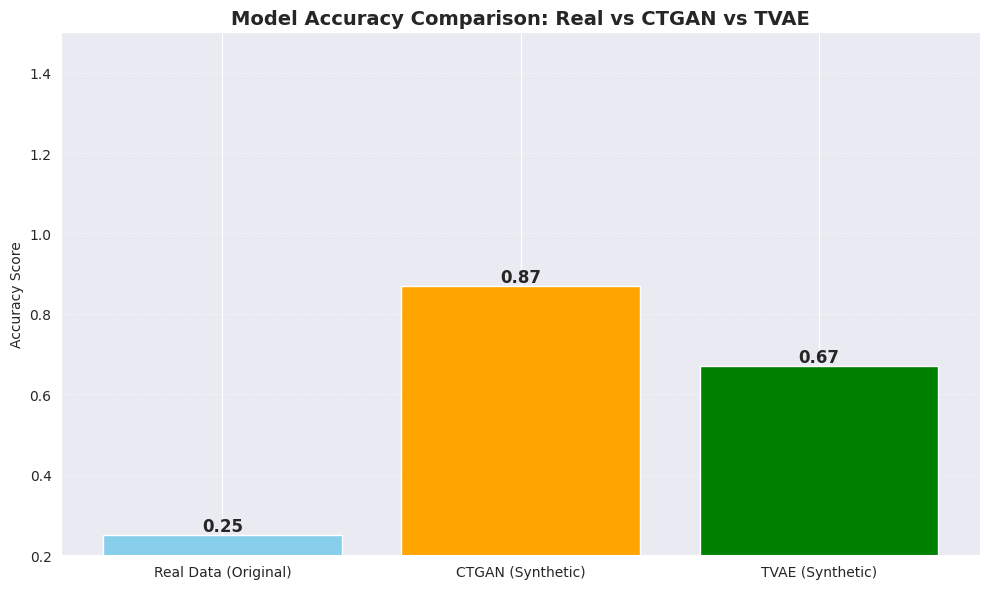

In [24]:
import matplotlib.pyplot as plt

#  accuracy values
# These are from your previous results:
real_acc = real_acc          # Accuracy on real data using real training
vae_acc = vae_acc           # Accuracy on synthetic VAE data
gan_acc = syn_acc           # Accuracy on synthetic GAN (CTGAN) data

# Prepare bar chart data
labels = ['Real Data (Original)', 'CTGAN (Synthetic)', 'TVAE (Synthetic)']
accuracy_scores = [real_acc, gan_acc, vae_acc]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracy_scores, color=['skyblue', 'orange', 'green'])

#  chart elements
plt.title('Model Accuracy Comparison: Real vs CTGAN vs TVAE', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy Score')
plt.ylim(0.2, 1.5)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Annotate bars
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()
